In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib as plt


Instalar dependencias

In [24]:
#pip install openpyxl pandas


Leer datos


In [25]:
data = pd.read_excel('./CardiologyMixed.xlsx')
data.head()

,age,gender,chest pain type,blood pressure,cholesterol,Fasting blood sugar <120,resting ecg,maximum heart rate,angina,peak,slope,#colored vessels,thal,class
0,60,Male,Asymptomatic,130,206,False,Hyp,132,True,2.4,Flat,2,Rev,Sick
1,49,Male,Abnormal Angina,130,266,False,Normal,171,False,0.6,Up,0,Normal,Healthy
2,64,Male,Angina,110,211,False,Hyp,144,True,1.8,Flat,0,Normal,Healthy
3,63,Male,Asymptomatic,130,254,False,Hyp,147,False,1.4,Flat,1,Rev,Sick
4,53,Male,Asymptomatic,140,203,True,Hyp,155,True,3.1,Down,0,Rev,Sick


In [26]:
datos = data.rename(columns={
    "age":"Edad",
    "gender":"Genero",
    "chest pain type":"Tipo de dolor en el pecho",
    "blood pressure":"Presion sanguinea",
    "cholesterol":"Colesterol",
    "Fasting blood sugar <120":"Azucar en sangre en ayunas",
    "resting ecg":"ECG en reposo",
    "maximum heart rate":"Frecuencia cardiaca maxima",
    "angina":"Angina",
    "peak":"Peak",
    "slope":"Pendiente",
    "#colored vessels": "Vasos sanguineos",
    "thal":"tal",
    "class":"Clase"

})
datos.head(15)

,Edad,Genero,Tipo de dolor en el pecho,Presion sanguinea,Colesterol,Azucar en sangre en ayunas,ECG en reposo,Frecuencia cardiaca maxima,Angina,Peak,Pendiente,Vasos sanguineos,tal,Clase
0,60,Male,Asymptomatic,130,206,False,Hyp,132,True,2.4,Flat,2,Rev,Sick
1,49,Male,Abnormal Angina,130,266,False,Normal,171,False,0.6,Up,0,Normal,Healthy
2,64,Male,Angina,110,211,False,Hyp,144,True,1.8,Flat,0,Normal,Healthy
3,63,Male,Asymptomatic,130,254,False,Hyp,147,False,1.4,Flat,1,Rev,Sick
4,53,Male,Asymptomatic,140,203,True,Hyp,155,True,3.1,Down,0,Rev,Sick
5,58,Female,Angina,150,283,True,Hyp,162,False,1.0,Up,0,Normal,Healthy
6,58,Male,Abnormal Angina,120,284,False,Hyp,160,False,1.8,Flat,0,Normal,Sick
7,58,Male,NoTang,132,224,False,Hyp,173,False,3.2,Up,2,Rev,Sick
8,63,Male,Angina,145,233,True,Hyp,150,False,2.3,Down,0,Fix,Healthy
9,67,Male,Asymptomatic,160,286,False,Hyp,108,True,1.5,Flat,3,Normal,Sick


In [27]:
datos.Clase.unique().tolist()


['Sick', 'Healthy']

``Mapear`` los valores a ``numéricos``

In [28]:
atributos = list(datos.columns)

for atri in atributos:
    if atri == "Genero":
        datos[atri] = datos[atri].map({
            "Male":0,"Female":1,
        })
    elif atri == "Tipo de dolor en el pecho":
        datos[atri] = datos[atri].map({ " Asymptomatic": 0, "Abnormal Angina":1, "Angina":2, "NoTang":3 })
    elif atri == "ECG en reposo":
        datos[atri] = datos[atri].map({ "Hyp":0, "Normal":1, "Abnormal":2 })
    elif atri == "Azucar en sangre en ayunas" or atri == "Angina":
        datos[atri] = datos[atri].map({ False:0, True:1 })
    elif atri == "Pendiente":
        datos[atri] = datos[atri].map({ "Flat":0, "Up":1, "Down":2 })
    elif atri == "tal":
        datos[atri] = datos[atri].map({ "Rev":0, "Normal":1, "Fix":2 })
    elif atri == "Clase":
        datos[atri] = datos[atri].map({"Sick":0, "Healthy":1})

datos.head()

,Edad,Genero,Tipo de dolor en el pecho,Presion sanguinea,Colesterol,Azucar en sangre en ayunas,ECG en reposo,Frecuencia cardiaca maxima,Angina,Peak,Pendiente,Vasos sanguineos,tal,Clase
0,60,0,0,130,206,0,0,132,1,2.4,0,2,0,0
1,49,0,1,130,266,0,1,171,0,0.6,1,0,1,1
2,64,0,2,110,211,0,0,144,1,1.8,0,0,1,1
3,63,0,0,130,254,0,0,147,0,1.4,0,1,0,0
4,53,0,0,140,203,1,0,155,1,3.1,2,0,0,0


``Separamos`` variables `independientes`

In [29]:
var_independientes = datos.columns[:-1].tolist()
x = datos[var_independientes].values
y=datos["Clase" ]

In [30]:
clasificar = DecisionTreeClassifier()
clasificar.fit(x,y)

pred = clasificar.predict([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])
print(pred)
_ = bool(pred)  
("Sick",  "Healthy")[_]

[1]


'Healthy'

Generar las ``reglas del arbol``

In [31]:
from sklearn import tree
reglas_arbol = tree.export_text(clasificar, feature_names=var_independientes, class_names=["Enfermo",  "Sano"],
                                show_weights=True, decimals=0)
print(reglas_arbol)

|--- Tipo de dolor en el pecho <= 0
|   |--- Vasos sanguineos <= 0
|   |   |--- tal <= 0
|   |   |   |--- Peak <= 1
|   |   |   |   |--- Colesterol <= 238
|   |   |   |   |   |--- Edad <= 42
|   |   |   |   |   |   |--- weights: [2, 0] class: Enfermo
|   |   |   |   |   |--- Edad >  42
|   |   |   |   |   |   |--- weights: [0, 5] class: Sano
|   |   |   |   |--- Colesterol >  238
|   |   |   |   |   |--- weights: [3, 0] class: Enfermo
|   |   |   |--- Peak >  1
|   |   |   |   |--- weights: [18, 0] class: Enfermo
|   |   |--- tal >  0
|   |   |   |--- Frecuencia cardiaca maxima <= 120
|   |   |   |   |--- weights: [2, 0] class: Enfermo
|   |   |   |--- Frecuencia cardiaca maxima >  120
|   |   |   |   |--- Angina <= 0
|   |   |   |   |   |--- Colesterol <= 316
|   |   |   |   |   |   |--- weights: [0, 21] class: Sano
|   |   |   |   |   |--- Colesterol >  316
|   |   |   |   |   |   |--- Colesterol <= 362
|   |   |   |   |   |   |   |--- weights: [1, 0] class: Enfermo
|   |   |   |   |

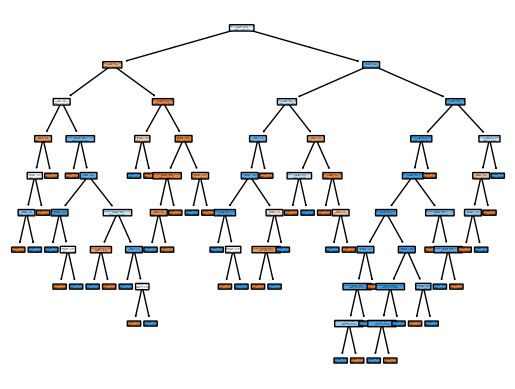

In [33]:
arbol = tree.plot_tree(clasificar, feature_names=var_independientes, class_names=["Faringitis",  "Alergia", "Resfriado"],
                          filled=True, rounded=True, impurity=False, proportion=True)
